# Tutorial 1 - Part II

# Faces recognition using eigenfaces and Naive Bayes


The dataset used in this tutorial is http://chrisdecoro.com/eigenfaces/index.html

In [1]:
import os
import sys
import numpy as np
from scipy import ndimage
from scipy import misc
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split # for sklearn version <=1.18 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

Note: Data can be found in the relative folder of this tutorial in data/yalefaces. 

In [2]:
# Function to read the images in the folder
def read_images (path , size = None) :    
    """ Read all images in given directory including its subdirectories """
    X , y, labels = [] , [], []
    c = 0
    for dirname , dirnames , filenames in os.walk (path) :
        #print(dirname,dirnames,filenames)
        print(dirnames)
        for subdirname in dirnames :
            print(subdirname) 
            subject_path = os.path.join ( dirname , subdirname )
            for filename in os.listdir ( subject_path ) :                
                try :
                    im = misc.imread( os.path.join ( subject_path , filename ) )
                    #print(im)
                    # resize to given size or reletive ratio/percentage ( if given )
                    if ( size is not None ) :
                        im = misc.imresize(im, size)
                    X.append ( np.asarray ( im , dtype = np.uint8 ) )
                    labels.append ( filename )
                    y.append ( c )
                        
                except IOError :
                    print("IO error")
                except :
                    print(" Unexpected error : " , sys.exc_info () [0])
                    raise
                    
                c = c + 1
    return [np.array(X) , np.array(y), np.array(labels) ]          


# Function to plot a list/array of images
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
# Function to convert the image 2D array to 1D vector
def asRowMatrix ( X ) :   
    if len ( X ) == 0:
        return np.array ([])
    mat = np.empty ((0 , X [0]. size ) , dtype = X [0]. dtype )
    for row in X :
        mat = np.vstack (( mat , np.asarray ( row ).reshape (1 , -1) ) )
    return mat        

['yalefaces']
yalefaces
IO error
IO error
[]
[[215 215 215 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 254 252]
 [255 255 255 ..., 255 255 254]
 [196 196 196 ..., 196 196 196]]


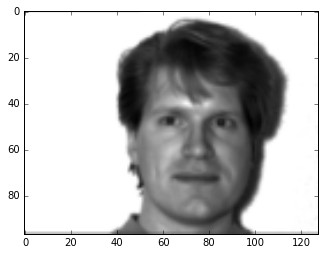

In [3]:
# Read images
path = "data"
X, y, labels = read_images(path , size = 0.4)
y = np.array([label.split(".")[0] for label in labels]) # subject id
y1 = np.array([label.split(".")[1] for label in labels]) # posture/conditions/...

print(X[0])
plt.figure()
plt.imshow(X[0], cmap=plt.cm.gray)
plt.show()

### Prepare the training and test data

In [4]:
# Convert images from 2D array to 1D array
Xrow = asRowMatrix(X);

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    Xrow, y, test_size=0.25, random_state=100)

n_samples, h, w = X.shape
n_features = X_train.shape[1]

# the label to predict is the id of the person
target_names = np.array(list(set(y)))
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 165
n_features: 12416
n_classes: 15


Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
dataset): unsupervised feature extraction / dimensionality reduction


Extracting the top 80 eigenfaces from 123 faces
Projecting the input data on the eigenfaces orthonormal basis


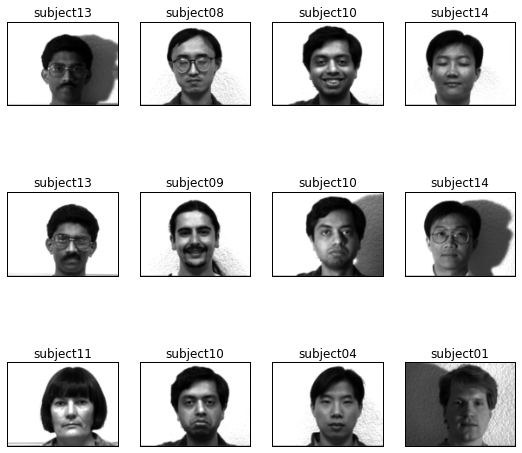

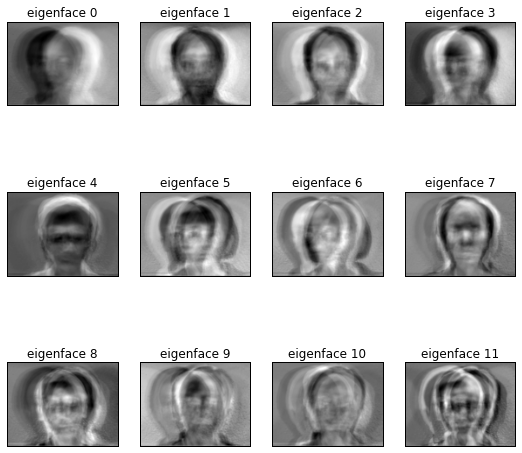

In [5]:
n_components = 80; 

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# plot gallery of the training images
plot_gallery(X_train, y_train, h, w)

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

Exercise 1: 

Plot the amount of variances explained by the first PCs

How to decide the number of components needed?

Can you set n_components to 130? 


In [ ]:
# You code here


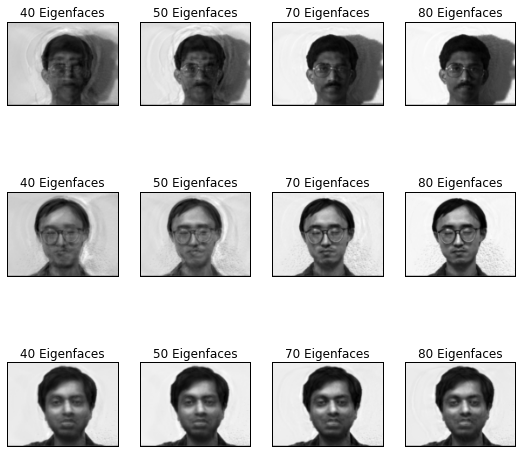

In [6]:
# How many principal components are needed for a good reconstruction of the images?

# use the first 3 image in the training set as an example:
# plot the gallery of images reconstructed from the most significative eigenfaces
X_rec, rectitles = [], [];
for i in range(3):
    for j in [40, 50, 70, 80]:
        X_rec1 = X_train_pca[i, range(j)].T.dot(pca.components_[range(j),:]) + pca.mean_
        X_rec.append(X_rec1)
        rectitles.append("%s Eigenfaces" % j)

X_rec = np.array(X_rec);
plot_gallery(X_rec, rectitles, h, w)
plt.show()

### Classication of the images using Naive Bayes classifier

In [7]:
# Training a Gaussian Naive Bayes classifier
# Option 1. Using the raw images as input
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
ypred_test = clf.predict(X_test)


Quantitative evaluation of the model quality on the test set

/Applications/CompTools/miniconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

  subject01       0.18      1.00      0.31         2
  subject02       1.00      0.60      0.75         5
  subject03       1.00      0.20      0.33         5
  subject04       1.00      1.00      1.00         2
  subject05       1.00      1.00      1.00         3
  subject06       1.00      1.00      1.00         2
  subject07       0.00      0.00      0.00         1
  subject08       0.20      0.67      0.31         3
  subject09       0.67      0.67      0.67         3
  subject10       0.00      0.00      0.00         2
  subject11       1.00      0.60      0.75         5
  subject12       0.33      0.50      0.40         2
  subject13       1.00      0.25      0.40         4
  subject15       0.00      0.00      0.00         3

avg / total       0.71      0.52      0.53        42

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0

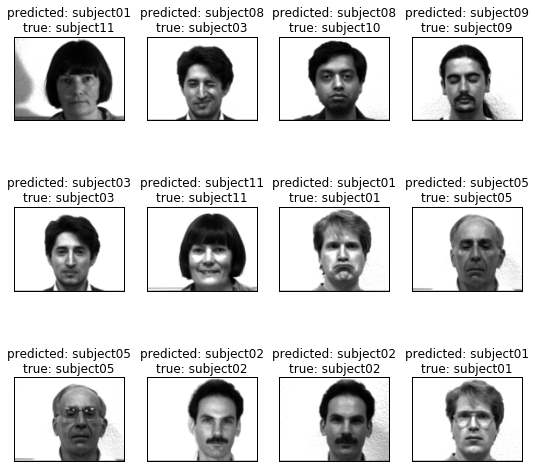

In [8]:
print(classification_report(y_test, ypred_test))
print(confusion_matrix(y_test, ypred_test))

# plot the gallery of test images with predicted labels
prediction_titles = [('predicted: %s\ntrue: %s' % (ypred_test[i], y_test[i])) 
                    for i in range(ypred_test.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

Exercise 2: 
Use transformed data after PCA with reduced dimensionality, 

In [ ]:
# Your code here:


